# Regresión Lineal con Python y scikit-learn

## Introducción

En este artículo, exploraremos cómo usar **la regresión lineal con Python para construir modelos de aprendizaje automático que puedan predecir resultados futuros.** Antes de profundizar en la regresión lineal, es importante tener una comprensión sólida de los requisitos previos necesarios para abordar la regresión lineal.

Estos son los **requisitos** previos que se necesitan **para abordar la regresión lineal con Python**:


- [Conocimiento de matemáticas para la inteligencia artificial.](https://deepnote.com/@mazzaroli/Introduccion-a-Funciones-Matematicas-para-Data-Science-e-Inteligencia-Artificial-f9a47b52-0308-4e95-a3d3-c3de3ef7b14f)

- [Conocimiento de análisis exploratorio de datos.](https://deepnote.com/@mazzaroli/Analisis-exploratorio-de-datos-caba7762-e435-481e-9060-523263a820b1)

- Conocimiento de visualización de datos con [Matplotlib](https://matplotlib.org/stable/users/index.html) y [Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html).

- [Conocimiento de los fundamentos de la inteligencia artificial.](https://deepnote.com/@mazzaroli/Introduccion-teorica-al-machine-learning-c4aded88-a409-4731-b650-6b3b43963d21)


Si no estás cómodo con estos conceptos, te recomendamos que primero los revises y los estudies antes de continuar con la regresión lineal. Con estos requisitos previos en mente, comenzaremos explorando cómo usar la regresión lineal con Python.

## Conociendo nuestros datos

En esta notebook aprenderás qué es una regresión lineal y cómo funciona con un ejemplo con Python. Para esto **lo primero que tendremos que hacer es descargar los datos y entender qué contienen.**

El conjunto de datos [**"Housing"**](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/) del repositorio de aprendizaje automático de la **Universidad de California en Irvine (UCI)** es uno de los conjuntos de datos más utilizados en la enseñanza de técnicas de regresión y análisis de datos.

**El conjunto de datos contiene 506 registros y 14 atributos**, que incluyen información como la tasa de impuesto a la propiedad, la proporción de habitaciones por vivienda ocupada, la tasa de criminalidad per cápita, entre otros.

1. **CRIM:** tasa de delincuencia per cápita por ciudad

1. **ZN:** proporción de terrenos residenciales zonificados para lotes de más de 25.000 pies cuadrados

1. **INDUS:** proporción de acres de negocios no minoristas por ciudad

1. **CHAS:** variable ficticia del río Charles (= 1 si la parcela limita con el río; 0 en caso contrario)

1. **NOX:** concentración de óxidos nítricos (partes por cada 10 millones)

1. **RM:** número promedio de habitaciones por vivienda

1. **AGE:** proporción de unidades ocupadas por sus propietarios construidas antes de 1940

1. **DIS:** distancias ponderadas a cinco centros de empleo de Boston

1. **RAD:** índice de accesibilidad a carreteras radiales

1. **TAX:** tasa de impuesto sobre la propiedad de valor total por cada $10,000

1. **PTRATIO:** relación alumno-maestro por ciudad

1. **B:** 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad

1. **LSTAT:** % de estatus social bajo de la población

1. **MEDV:** valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares ($1000)

In [259]:
import pandas as pd

df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', 
    header=None, # especificamos que el dataset no tiene headers.
    sep='\s+') # especificamos que la separacion esta hecha por espacios y no por comas.

df.columns = ["CRIM","ZN","INDUS" , "CHAS" ,"NOX","RM" ,"AGE","DIS", "RAD","TAX", "PTRATIO", "B" , "LSTAT" , "MEDV"]

df.head()

KeyboardInterrupt: 

## Análisis de datos para tu primera regresión lineal

Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que recomiendo que empecemos viendo un gráfico de correlaciones usando **[pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)** de ***Seaborn*** con las siguientes variables objetivos:

- **DIS:** distancias ponderadas a cinco centros de empleo de Boston
- **INDUS:** proporción de acres de negocios no minoristas por ciudad
- **CRIM:** tasa de delincuencia per cápita por ciudad
- **RM:** número promedio de habitaciones por vivienda
- **MEDV:** valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares ($1000)

### Análisis visual


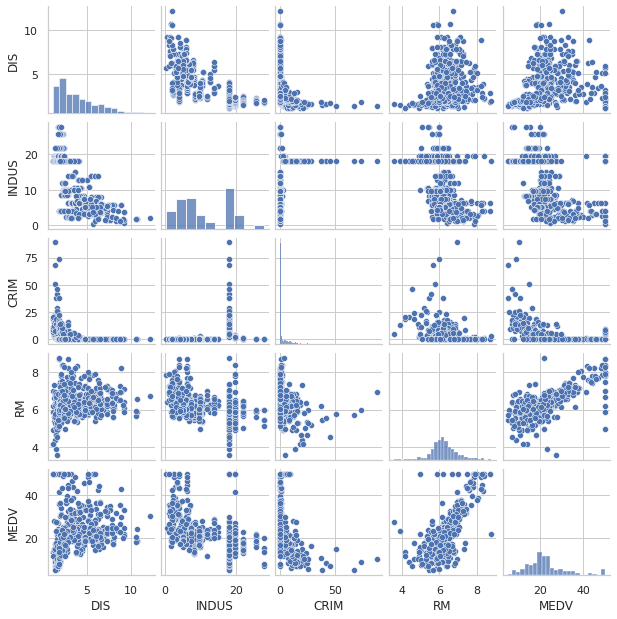

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos la apariencia de los graficos
sns.set(style='whitegrid', context='notebook')

# Seleccionamos los features que mas nos interesa para ver la correlacion entre las variables
cols = ["DIS", "INDUS", "CRIM", "RM","MEDV"]

# Graficamos con un pairplot las variables de interes para ver sus relaciones
sns.pairplot(df[cols], height=1.75);

#### Insight
Al observar la distribución de la variable **MEDV**, podemos ver que se asemeja a una **distribución normal** con algunos valores atípicos. Esto es importante porque **MEDV es la variable objetivo que se desea predecir**. Si la variable objetivo sigue una distribución normal, es más fácil y preciso construir un modelo que pueda predecir su valor.

Además, la variable **RM** también muestra un similitud a una distribución normal. En este caso, se puede observar una **tendencia lineal positiva entre RM y MEDV**, lo que **sugiere que a medida que aumenta el valor de RM, también aumenta el valor de MEDV**. Por lo tanto, se podría utilizar esta relación para construir un **modelo de regresión lineal** que prediga el valor de MEDV en función de RM.

### Análisis numérico

Al realizar un **análisis visual** de un conjunto de datos, **se obtienen ideas generales de las relaciones entre las variables** y patrones. Sin embargo, **es importante complementarlo con un análisis numérico para confirmar que nuestras suposiciones** para confirmar si son correctas.

**El análisis numérico** puede incluir el cálculo de medidas estadísticas como la **media, la mediana y la desviación estándar**, así como la realización de **pruebas de hipótesis** y la evaluación de **correlaciones entre variables**.

En este caso, **se observa una relación aparentemente lineal**, por lo cual **es necesario calcular la correlación numérica para determinar si es significativa y cuánto es su fuerza**. Asimismo, **en cuanto a los valores atípicos**, es necesario analizar numéricamente su **impacto en las medidas estadísticas** y determinar si deben ser **excluidos** o si representan **información importante**.

<AxesSubplot: >

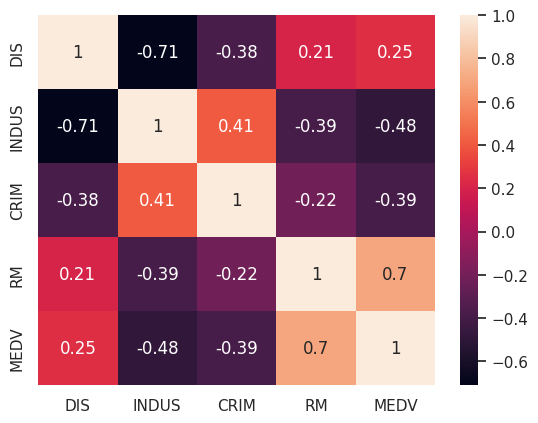

In [ ]:
sns.heatmap(
    data=df[cols].corr(), 
    cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

#### Insight

- En particular, se observó que la correlación entre las variables RM y MEDV es positiva y relativamente alta en comparación con las demás variables. Esto significa que **a medida que aumenta el número promedio de habitaciones por vivienda (RM), también tiende a aumentar el valor mediano de las viviendas ocupadas por sus propietarios (MEDV).**

- La correlación entre INDUS y DIS es negativa, es decir, esto podría indicar que **a medida que una ciudad tiene una mayor cantidad de negocios no minoristas, es más probable que se encuentre cerca de los centros de empleo de Boston.**

- la correlación entre valor mediano de las viviendas ocupadas por sus propietarios (MEDV) y la proporción de acres de negocios no minoristas por ciudad (INDUS) es de -0.483. Esta correlación negativa sugiere que **a medida que aumenta la proporción de acres de negocios no minoristas por ciudad (INDUS), el valor mediano de viviendas ocupadas por el propietario (MEDV) tiende a disminuir.**

## Entrenando un modelo de regresión lineal con scikit-learn

### Que es un modelo de regresion lineal?

**Un modelo de regresión lineal se utiliza para encontrar la línea recta que mejor se ajusta a los datos y que se puede utilizar para hacer predicciones sobre nuevos datos.** La fórmula incluye términos de intercepción y coeficiente de regresión, y el objetivo del modelo es minimizar la suma de los cuadrados de los errores para obtener la mejor línea recta.

Ahora realizaremos un modelo de **regresión lineal simple** para **predecir el precio de una casa** (variable dependiente) **en función del promedio de habitaciones** (variable independiente).

La idea del siguiente ejercicio es ver como se utiliza un modelo de regresión lineal simple para predecir la mediana del precio de las casas en Boston a partir del número promedio de habitaciones.

In [ ]:
# Guardamos los datos de interes en una variable x e y
x = df['RM'].values.reshape(-1,1) # variable independiente
y = df['MEDV'].values.reshape(-1,1) # variable dependiente

In [ ]:
from sklearn.preprocessing import StandardScaler

# instanciamos el modelo de escalamiento
sc_x = StandardScaler()
sc_y = StandardScaler()

In [ ]:
# estandarizamos los datos z=(x-u)/std
x_standard = sc_x.fit_transform(x)
y_standard = sc_y.fit_transform(y)

In [ ]:
from sklearn.linear_model import LinearRegression 

# Instanciamos y ajustamos el modelo de regresión lineal
slr = LinearRegression() # Standar Linear Regression (slr)
slr.fit(x_standard,y_standard)

LinearRegression()

Text(0, 0.5, 'Mediana del precio de las casas x1000 (MEDV)')

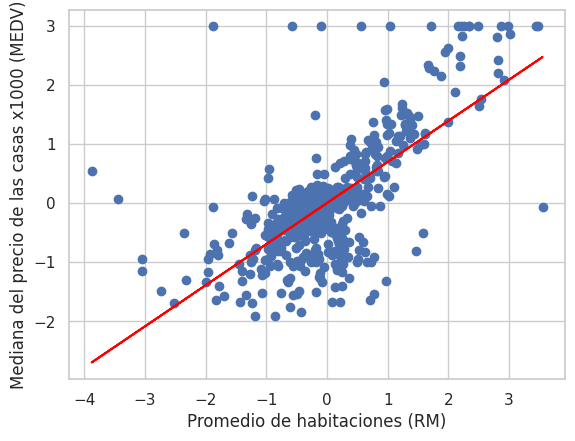

In [ ]:
# Graficamos los datos estandarizados
plt.scatter(x_standard, y_standard)
# Graficamos la linea de regresion ajustada
plt.plot(x_standard, slr.predict(x_standard), color='red')

plt.xlabel("Promedio de habitaciones (RM)")
plt.ylabel("Mediana del precio de las casas x1000 (MEDV)")

In [ ]:
import numpy as np

# Representamos el numero de habitaciones de la casa que queremos predecir
num_habitaciones = 5

# Estandarizamos sc_x para predecir el predio de la casa
num_habitaciones_standard = sc_x.transform(np.array([num_habitaciones]).reshape(-1,1))

# Usamos la transformada inversa en el resultado para volver a la escala original 
result = sc_y.inverse_transform(slr.predict(num_habitaciones_standard))
print("El precio de una casa con 5 habitaciones en Boston es de", result*1000)

El precio de una casa con 5 habitaciones en Boston es de [[10839.92412946]]


# Cómo funciona la regresión lineal

## ¿Qué es la regresión lineal?

La regresión lineal es un **algoritmo de aprendizaje supervisado** utilizado para modelar la relación entre una variable dependiente $(Y)$ y una o más variables independientes $(X)$. **El objetivo del modelo es encontrar la línea recta que mejor se ajusta a los datos** y utilizarla para hacer predicciones sobre nuevos datos.

#### Seleccionar el modelo adecuado

**El modelo de regresión lineal simple** es el más sencillo y **se utiliza cuando solo se tiene una variable independiente $(\textbf{X})$.** Cuando se tienen **más de una variable independiente**, **se utiliza** el modelo de **regresión lineal múltiple**.

#### Definir la hipótesis:

**La hipótesis del modelo de regresión lineal es que existe una relación lineal entre la variable dependiente y la variable independiente,** si existe una relación lineal entre las variables, **se espera que los puntos se agrupen alrededor de una línea recta.** Esta relación se puede expresar mediante la siguiente ecuación:

$y = \beta 0 + \beta 1x + ε$

donde:

- ${y}$: es la variable dependiente o variable a predecir.
- ${x}$: es la variable independiente o variable explicativa.
- $\beta{0}$: es el término de intercepción, que representa el valor de y cuando x es igual a cero.
- $\beta{1}$: es el coeficiente de regresión, que representa la pendiente de la línea recta.
- ${e}$: es el término de error, que representa la diferencia entre el valor observado y el valor predicho.

En el contexto del inteligencia artificial, $\beta{0}$ y $\beta{1}$ conocidos como $\textbf{w}{0}$ y $\textbf{w}{1}$ **corresponden a los pesos del modelo**, los pesos **son valores que se utilizan para determinar la importancia relativa de cada variable de entrada en la predicción de la variable de salida.**


## Cuándo utilizar un modelo de regresión lineal

### Preguntas clave para determinar si la regresión lineal es adecuada

**¿Tengo una variable dependiente numérica que quiero predecir a partir de una variable independiente numérica?**

Si la variable dependiente $(Y)$ que queremos predecir es numérica y la variable independiente $(X)$ que usamos para hacer la predicción también es numérica, entonces un modelo de regresión lineal podría ser una buena opción para resolver el problema.

**¿Cuento con una gran cantidad de variables y / o variables categóricas con muchos niveles?**

Si hay variables categóricas con muchos niveles, es posible que la regresión lineal no sea el modelo más adecuado para el análisis, ya que puede haber dificultades en la interpretación de los resultados. En este caso, podría ser más apropiado utilizar modelos de regresión logística o modelos de árbol de decisión para variables categóricas con muchos niveles.

### Recomendaciones para determinar si la regresión lineal

**Probar otros modelos**

La regresión lineal puede no ser el mejor modelo para todas las situaciones, por lo que siempre es recomendable explorar otros modelos, como la regresión logística, el árbol de decisión o el Random Forest, entre otros.

**Reducir las variables**

Si tienes muchas variables independientes, es posible que tu modelo sufra de **overfitting** o que algunas variables no sean relevantes para predecir la variable dependiente. En ese caso, se recomienda realizar un **análisis de correlación y eliminar aquellas variables con baja correlación** con la variable dependiente.

**Multicolinealidad**

La multicolinealidad ocurre cuando hay una alta correlación entre dos o más variables independientes, por ejemplo tener la variable de peso en kg y peso en lbs provocaria una multicolinealidad. Esto puede afectar negativamente el modelo de regresión lineal, por lo que se recomienda identificar y eliminar las variables redundantes.

**No predecir fuera del dominio de la variable independiente**

Es importante tener en cuenta el dominio de la variable independiente al realizar predicciones. Si se intenta predecir fuera de este rango, los resultados pueden ser poco confiables o incluso absurdos. Es importante conocer bien los límites de la variable independiente antes de realizar predicciones con regresión lineal.

## Función de pérdida y optimización: mínimos cuadrados

El [**MSE (Mean Squared Error)**, o **Error Cuadrático Medio**](https://www.youtube.com/watch?v=k964_uNn3l0), es una medida comúnmente utilizada para **evaluar el rendimiento de modelos de regresión**. El MSE es el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales.

Para calcular el MSE, puedes seguir los siguientes pasos:

1. Calcula el **error al cuadrado** (la diferencia entre la predicción del modelo y el valor real, al cuadrado) para cada punto de datos.
1. Suma todos los errores al cuadrado.
1. Divide la suma de errores al cuadrado por el número de puntos de datos para obtener el MSE.

La fórmula para calcular el MSE es:

$MSE = \displaystyle\frac{1}{n} * Σ (y_i - \hat{y}_i)^2$

Donde:

- $n$ es el número de puntos de datos
- $y_i$ es el valor real del i-ésimo punto de datos
- $\hat{y}_i$ es la predicción del modelo para el i-ésimo punto de datos.

Hagamos el paso a paso de como calcular el MSE con un conjunto de entrada aleatorio ascendente:

Teniendo en cuenta la formula del Error Cuadrático Medio, requerimos saber el valor de $y'$, por lo tanto calcularemos la predicción $y'$ utilizando la recta de regresión lineal 

$y' = m*x+b$

donde

$m = \displaystyle\frac{n*\sum{xy} - (\sum{x})(\sum{y})}{(n*\sum{x}^2) - (\sum{x})^2}$

$b = \displaystyle\frac{\sum{y} - m * \sum{x}}{n}$

In [291]:
import numpy as np

# Se definen los datos de entrada
x=np.array([1.2, 2,3.2,2.5,5,6,4,8])
y=np.array([2,3,3.4,3.1,4,4.7,3.8,7])

# Se calcula el tamaño del conjunto de datos
n = len(x)

In [292]:
# Se calculan las sumas de los productos de los elementos de x e y, x^2, y las sumas de los elementos de x e y
xy = np.sum((x*y),axis=0)
x_2 = np.sum((x**2), axis=0)
sum_x = np.sum(x, axis=0)
sum_y = np.sum(y, axis=0)

In [293]:
# Se define la función para calcular la pendiente de la recta de regresión lineal
def m():
    numerador = (n*xy) - (sum_x * sum_y)
    denominador = (n*x_2) - (sum_x)**2
    return np.divide(numerador,denominador)

# Se calcula la pendiente m
m = m()

In [294]:
# Se define la función para calcular la intercepción de la recta de regresión lineal
def b():
    numerador = sum_y - (m * sum_x)
    denominador = n
    return np.divide(numerador, denominador)

# Se calcula la intercepción b
b = b()

In [295]:
# Se define la función para calcular la predicción y' utilizando la recta de regresión lineal
def f():
    return (m*x)+b

In [296]:
# Se calcula la predicción y'
y_prima = f()
# Se calcula la suma de las predicciones y'

sum_y_prima = np.sum(y_prima, axis=0)

In [297]:
# Se define la función para calcular el MSE
def MSE():
    return (1/n) * np.sum((y - y_prima)**2, axis=0)

# Se calcula el MSE
mse = MSE()

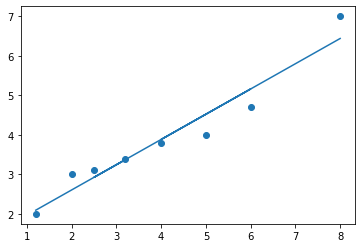

In [298]:
plt.plot(x,y_prima)
plt.scatter(x,y)

In [300]:
df = pd.DataFrame.from_dict({
    "x"       :x,
    "y"       :y,
    "y_prima" :y_prima,
    "xy"      :xy,
    "x_2"     :x_2,
    "sum_x"   :sum_x,
    "sum_y"   :sum_y,
    "m"       :m,
    "b"       :b,
    "mse"     :mse
},)
df

,x,y,y_prima,xy,x_2,sum_x,sum_y,m,b,mse
0,1.2,2.0,2.094815,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379
1,2.0,3.0,2.605720,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379
2,3.2,3.4,3.372078,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379
3,2.5,3.1,2.925036,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379
4,5.0,4.0,4.521614,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379
5,6.0,4.7,5.160246,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379
6,4.0,3.8,3.882983,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379
7,8.0,7.0,6.437508,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379


## Evaluando el modelo: R^2 y MSE

El propósito de evaluar un modelo de regresión es **determinar qué tan bien se ajusta el modelo a los datos de entrenamiento y cómo de bien generaliza a nuevos datos**. Esto es importante porque **un modelo que se ajusta muy bien a los datos de entrenamiento puede tener un sobreajuste (overfitting).** Por otro lado, **un modelo que no se ajusta bien a los datos de entrenamiento puede subestimar la relación entre las variables y no ser capaz de predecir de manera efectiva los valores de la variable objetivo**.


El error cuadrático medio (MSE) y el coeficiente de determinación (R-cuadrado $R^2$)  son dos métricas comunes que se usan para evaluar el rendimiento de un modelo de regresión.

### El error cuadrático medio (MSE)

El error cuadrático medio (MSE) es otra métrica utilizada para evaluar modelos de regresión. El MSE mide el promedio de los cuadrados de los errores de predicción entre el modelo y los valores reales en el conjunto de datos. En otras palabras, el MSE calcula la diferencia cuadrática promedio entre los valores predichos por el modelo y los valores reales observados. **Cuanto menor sea el valor de MSE, mejor será el ajuste del modelo a los datos.**

<img src='https://gbhat.com/assets/gifs/linear_regression.gif' width=500>

### El coeficiente de determinación $(R^2)$

El coeficiente de determinación, denotado por R-cuadrado o R^2, es una métrica que **indica qué porcentaje de la variabilidad en la variable dependiente puede ser explicada por la variable independiente en un modelo de regresión lineal.** Es decir, R-cuadrado mide la calidad del ajuste del modelo a los datos. **El valor de R-cuadrado varía entre 0 y 1**, donde **0 indica que el modelo no explica ninguna de la variabilidad** en la variable dependiente y **1 indica que el modelo explica toda la variabilidad**. Por lo tanto, **cuanto mayor sea el valor de R-cuadrado, mejor será el ajuste del modelo a los datos.**

<img src='https://bookdown.org/pkaldunn/Book/34-Correlation_files/figure-html/R2Plots-.gif' width=500>


### Otras metricas importantes  a conciderar

- **R ajustada (R² ajustada):** La R ajustada es una medida de la cantidad de variación en la variable dependiente que es explicada por la variable independiente(s) en el modelo. A diferencia de la R², la R ajustada penaliza por la inclusión de variables irrelevantes o redundantes en el modelo.

- **Error máximo:** Esta métrica mide el mayor error absoluto en las predicciones del modelo. Es útil para identificar observaciones que están lejos de la línea de regresión y que pueden estar afectando la calidad del modelo.

- **Error absoluto promedio (MAE):** El MAE mide el promedio de los errores absolutos en las predicciones del modelo. Es útil para tener una idea de la magnitud promedio de los errores de predicción.

- **Mediana del los errores absolutos:** La mediana del error absoluto es una medida de la centralidad que indica el valor de la predicción que tiene la mitad de los errores por debajo y la otra mitad por encima. Es útil cuando los datos están sesgados y la media no es una medida representativa de los errores.

- **Raíz del promedio de los errores cuadrados (RMSE):** El RMSE mide el error promedio de las predicciones del modelo en unidades de la variable dependiente. Es una medida común para evaluar la precisión de los modelos de regresión.

- **Varianza explicada:** La varianza explicada mide la proporción de la varianza total en la variable dependiente que es explicada por la variable independiente(s) en el modelo. Es útil para evaluar la calidad del ajuste del modelo y comparar modelos diferentes.

### La gráfica de residuales

La gráfica de residuales es una herramienta de diagnóstico que se utiliza para evaluar la calidad del ajuste de un modelo de regresión lineal. En esta gráfica, se grafican los residuos del modelo (la diferencia entre los valores observados y los valores predichos por el modelo) en el eje vertical y los valores predichos por el modelo en el eje horizontal.

Una buena gráfica de residuales debería mostrar una distribución aleatoria de los residuos alrededor del valor cero en el eje vertical. Esto indicaría que el modelo se ajusta bien a los datos y que los residuos no tienen patrones discernibles. Si hay patrones en la distribución de los residuos, como una curva en forma de U o una relación no lineal, esto sugiere que el modelo no se ajusta bien a los datos.

En resumen, la gráfica de residuales es una herramienta visual que nos ayuda a entender cómo se distribuyen los residuos en relación con los valores predichos por el modelo. Si los residuos tienen un patrón discernible, es una señal de que el modelo puede no estar ajustándose bien a los datos y puede ser necesario realizar ajustes en el modelo o en los datos de entrada.